<a href="https://colab.research.google.com/github/Suraba03/ml_san_francisco_permits/blob/main/san_fancisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import data and first glance

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
!ls

Building_Permits.csv  drive  sample_data


In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/san_francisco/Building_Permits.csv')

<ipython-input-30-5a9255161ba3>:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/san_francisco/Building_Permits.csv')


In [3]:
pd.set_option('display.max_columns', None)

In [31]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [32]:
df.shape

(198900, 43)

# preprocessing

let's remove white spaces from columns names

In [33]:
df = df.rename(lambda name: name.replace(" ", ""), axis='columns')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   PermitNumber                         198900 non-null  object 
 1   PermitType                           198900 non-null  int64  
 2   PermitTypeDefinition                 198900 non-null  object 
 3   PermitCreationDate                   198900 non-null  object 
 4   Block                                198900 non-null  object 
 5   Lot                                  198900 non-null  object 
 6   StreetNumber                         198900 non-null  int64  
 7   StreetNumberSuffix                   2216 non-null    object 
 8   StreetName                           198900 non-null  object 
 9   StreetSuffix                         196132 non-null  object 
 10  Unit                                 29479 non-null   float64
 11  UnitSuffix   

let's split features list in two: numerical and categorical

In [48]:
num_cols = [col for col in df.columns if "int" in str(df[col].dtype) or "float" in str(df[col].dtype)]
cat_cols = [col for col in df.columns if "object" == str(df[col].dtype) and col != "CurrentStatus"]
print(num_cols)
print(cat_cols)

['PermitType', 'StreetNumber', 'Unit', 'NumberofExistingStories', 'NumberofProposedStories', 'EstimatedCost', 'RevisedCost', 'ExistingUnits', 'ProposedUnits', 'Plansets', 'ExistingConstructionType', 'ProposedConstructionType', 'SupervisorDistrict', 'Zipcode', 'RecordID']
['PermitNumber', 'PermitTypeDefinition', 'PermitCreationDate', 'Block', 'Lot', 'StreetNumberSuffix', 'StreetName', 'StreetSuffix', 'UnitSuffix', 'Description', 'CurrentStatusDate', 'FiledDate', 'IssuedDate', 'CompletedDate', 'FirstConstructionDocumentDate', 'StructuralNotification', 'VoluntarySoft-StoryRetrofit', 'FireOnlyPermit', 'PermitExpirationDate', 'ExistingUse', 'ProposedUse', 'TIDFCompliance', 'ExistingConstructionTypeDescription', 'ProposedConstructionTypeDescription', 'SitePermit', 'Neighborhoods-AnalysisBoundaries', 'Location']


In [49]:
target = "CurrentStatus"

In [37]:
import seaborn as sns

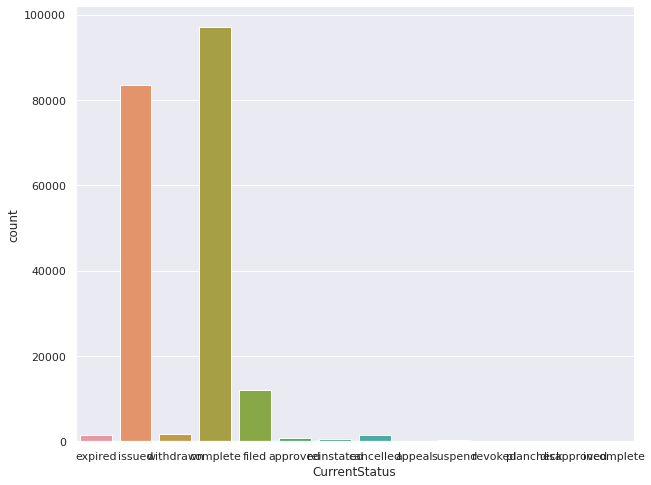

In [52]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x=target, data=df);

In [47]:
df[target].value_counts() / df.shape[0]

8    0.899165
3    0.073720
4    0.014540
2    0.004776
6    0.003017
7    0.002569
1    0.001755
5    0.000458
Name: PermitType, dtype: float64

just a sanity check

In [51]:
set(num_cols+cat_cols + [target]) == set(df.columns)

True

## deal with missing values

In [41]:
for i in df.columns:
    print(i)

PermitNumber
PermitType
PermitTypeDefinition
PermitCreationDate
Block
Lot
StreetNumber
StreetNumberSuffix
StreetName
StreetSuffix
Unit
UnitSuffix
Description
CurrentStatus
CurrentStatusDate
FiledDate
IssuedDate
CompletedDate
FirstConstructionDocumentDate
StructuralNotification
NumberofExistingStories
NumberofProposedStories
VoluntarySoft-StoryRetrofit
FireOnlyPermit
PermitExpirationDate
EstimatedCost
RevisedCost
ExistingUse
ExistingUnits
ProposedUse
ProposedUnits
Plansets
TIDFCompliance
ExistingConstructionType
ExistingConstructionTypeDescription
ProposedConstructionType
ProposedConstructionTypeDescription
SitePermit
SupervisorDistrict
Neighborhoods-AnalysisBoundaries
Zipcode
Location
RecordID


In [42]:
df.PermitType.unique()

array([4, 3, 8, 6, 7, 1, 5, 2])